## Исследование регистрируемой безработицы в России.

<b>Задача:</b>
Для составления аналитического обзора по проблеме безработицы в России необходимо провести исследование основных социально-демографических характеристик безработных и ситуацию в 2020 году.<br>

<b>Источник данных:</b><br>
Регистрируемая безработица в России: общие социально-демографические характеристики с детализацией до органа занятости населения // Роструд; обработка: Колесников И.В., Копыток В.К., Кузьмина Ю.В., Инфраструктура научно-исследовательских данных, АНО «ЦПУР», 2021. Доступ: открытая лицензия в исследовательских целях. Размещено: 21.10.2021. (Ссылка на набор данных: http://data-in.ru/data-catalog/datasets/180/)

<b>Описание данных:</b><br>

### <a class="anchor" id="1"></a> Загрузка данных. Предобработка

In [12]:
import pandas as pd
df = pd.read_csv('unemployed.zip', sep=';') 

C:\Users\Арсений\AppData\Local\Temp\ipykernel_24316\363244243.py:2: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('unemployed.zip', sep=';') #импортируем данные


In [18]:
df.shape

(4347416, 12)

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


2. Датасет содержит 4347416 строк и 12 стобцов

In [21]:
df.head()

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2


In [28]:
df.columns

Index(['id', 'district', 'region', 'month_application', 'changed_value', 'age',
       'gender', 'education', 'hc_repeat', 'hc_didnotwork', 'find_new_job',
       'count', 'year', 'month'],
      dtype='object')

In [20]:
df.isna().sum() 

id                   0
district             0
region               0
month_application    0
changed_value        0
age                  0
gender               0
education            0
hc_repeat            0
hc_didnotwork        0
find_new_job         0
count                0
dtype: int64

4.1. Пропущенных значений нет

In [5]:
df[df.duplicated(keep=False)] 

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count


4.2. Дубликатов нет

In [6]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4347416 entries, 0 to 4347415
Data columns (total 12 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   id                 int64 
 1   district           object
 2   region             object
 3   month_application  object
 4   changed_value      bool  
 5   age                object
 6   gender             object
 7   education          object
 8   hc_repeat          bool  
 9   hc_didnotwork      bool  
 10  find_new_job       bool  
 11  count              int64 
dtypes: bool(4), int64(2), object(6)
memory usage: 281.9+ MB


С типами данных всё хорошо

In [24]:
#Добавляем годы
df['year'] = pd.to_datetime(df['month_application']).dt.year 

In [26]:
#Добавляем месяцы
df['month'] = pd.to_datetime(df['month_application']).dt.month 

In [27]:
df

,id,district,region,month_application,changed_value,age,gender,education,hc_repeat,hc_didnotwork,find_new_job,count,year,month
0,1170,Дальневосточный федеральный округ,Амурская область,2017-01,False,52-57,0,4,True,False,False,1,2017,1
1,256,Дальневосточный федеральный округ,Амурская область,2017-01,False,22-27,1,4,True,False,False,1,2017,1
2,711,Дальневосточный федеральный округ,Амурская область,2017-01,False,34-39,1,4,True,False,True,1,2017,1
3,799,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,0,4,False,False,False,1,2017,1
4,861,Дальневосточный федеральный округ,Амурская область,2017-01,False,40-45,1,2,True,False,False,2,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347411,4346979,Южный федеральный округ,Ростовская область,2020-12,False,28-33,0,None,False,False,False,3,2020,12
4347412,4346817,Южный федеральный округ,Ростовская область,2020-12,False,16-21,0,None,False,False,False,2,2020,12
4347413,4347212,Южный федеральный округ,Ростовская область,2020-12,False,40-45,1,None,False,False,False,5,2020,12
4347414,4347025,Южный федеральный округ,Ростовская область,2020-12,False,28-33,1,None,False,False,False,4,2020,12


In [78]:
education_repl = {"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9}
gend_repl = {"1":1,"0":0}

In [79]:
df['gender'] = df['gender'].replace(gend_repl)
df['education'] = df['education'].replace(education_repl)

## Выводы

1. Датасет  содержит 4347416 строки и 12 стобцов.
2. В названии столбцов проблем нет, дубликаты не найдены, пропуски не найдены, с типами данных проблем нет, 2 стобца имеют тип данных int 64 (целочисленные значения), 6 стобцов тип данных object, 4 стобца тип данных bool.
3. Мы добавили столбцы с месяцем и годом


###  <a class="anchor" id="1"></a> Исследовательский анализ данных

Все отчеты в этом разделе должны быть визуализированы. Графики должны содержать названия и подписи осей. Каждый пункт сопровидите выводами.

1. Определите динамику числа обращений в службу занятости за представленный в датасете период. Постройте линейный график. Укрупните по годам. Постройте столбчатую диаграмму. Добавьте признак повторных обращений в центры занятости населения, Постройте линейный график.
2. Определите число обращений в службу занятости по возрастным группам. Постройте столбчатую диаграмму.<br> *2.1 Детализируйте по каждому году, визуализируйте результат.
3. Определите общее число устроившихся на работу граждан, определите процент трудоустройства по всему датасету. Постройте столбчатую диаграмму.
4. Определите соотношение трудоустройства по каждому году (в абсолютных значениях). Постройте столбчатую диаграмму.<br>
*4.1 Выполните в относительных значениях, оцените динамику процента трудоустройства по годам.
5. Осуществите категоризацию по столбцам <code>gender</code> и <code>education</code> в соответствии с исходными данными. Определите с каким образованием в службу занятости обращаются гражданине, ранее официально не работавшие. Определите соотношение трудоустройства по каждому уровню образования.
6. Исследуйте безработицу в России отдельно за 2000 год (за исключением декабря 2020!). Создайте срез данных.<br>
6.1 Определите динамику числа безработных и нашедших работу за 2020 год по месяцам.<br>
6.2 Определите процент трудоустройства по гендерной принадлежности<br>
6.3 Определите число обращений в службу занятости по федеральным округам.<br>
6.4 Определите разброс числа объявлений по регионам с помощью boxplot.<br>
6.5 Определите число обращений в службу занятости в Северо-Западном федеральном округе по регионам.<br>
***6.6 Определите процент трудоустройства по федеральным округам.<br>
***6.7 Определите процент трудоустройства по регионам для каждого федерального округа. Реализуйте в цикле<br>




In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data_req = pd.pivot_table(df, values = 'count', index=['region','district','year','month','hc_repeat','find_new_job','age','gender','education'], aggfunc='sum').reset_index()

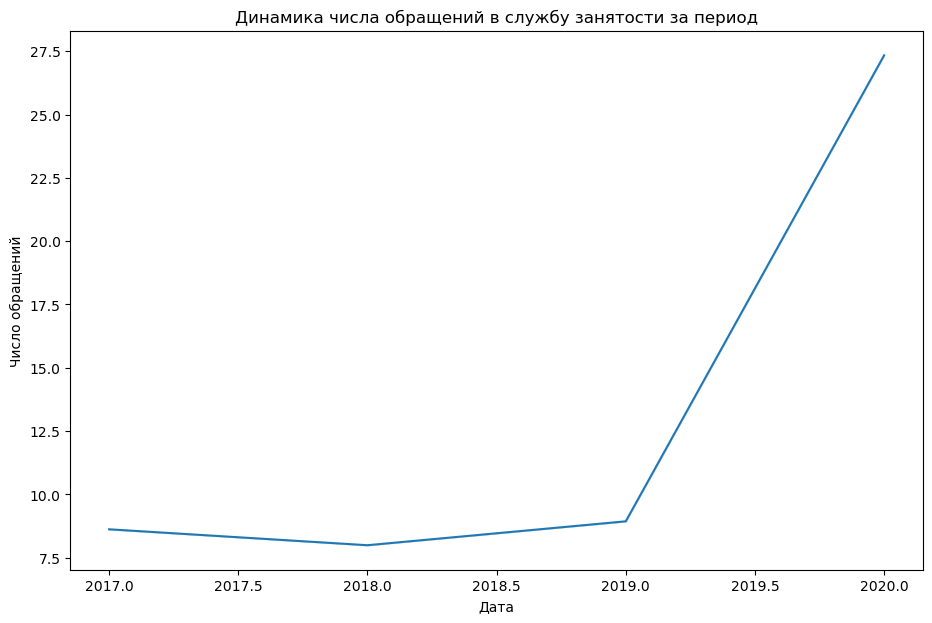

In [82]:
sns.lineplot(data=data_req, x='year', y='count', ci=False).set(title='Динамика числа обращений в службу занятости за период',
                                                                 xlabel='Дата', 
                                                                 ylabel='Число обращений'
                                                                 )
plt.show()

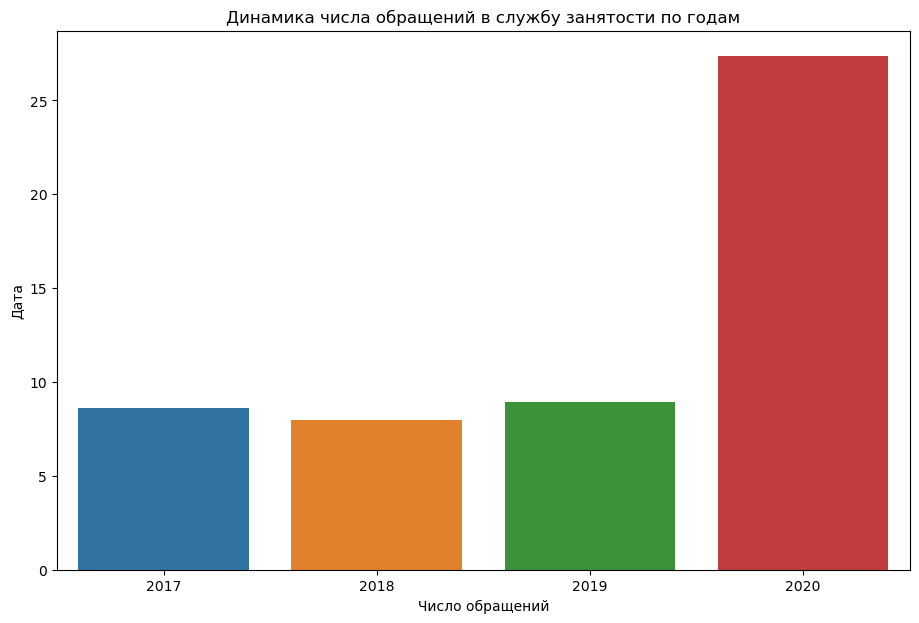

In [83]:
sns.barplot(data=data_req, y='count', x='year', ci=None).set(title='Динамика числа обращений в службу занятости по годам',
                                                                               ylabel='Дата',
                                                                               xlabel='Число обращений')
plt.show()

[Text(0.5, 1.0, 'Динамика обращений в службу занятости'),
 Text(0.5, 0, 'Год'),
 Text(0, 0.5, 'Количество обращений')]

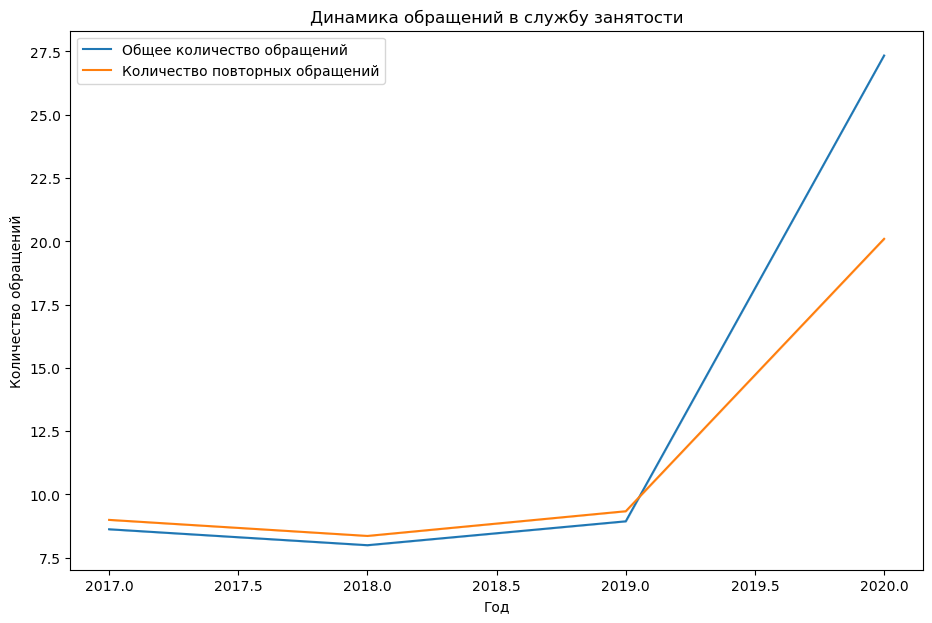

In [84]:
x=sns.lineplot(data = data_req, x = 'year', y = 'count', ci=False, label = 'Общее количество обращений')
(sns.lineplot(data = data_req[data_req['hc_repeat']==True], x = 'year', y = 'count', ci=False, label = 'Количество повторных обращений'))
x.set(title='Динамика обращений в службу занятости', xlabel='Год', ylabel = 'Количество обращений') 

Выводы: Как видно на графике с 2019 года общее количство обращений стало расти быстрее количества повторных обращений

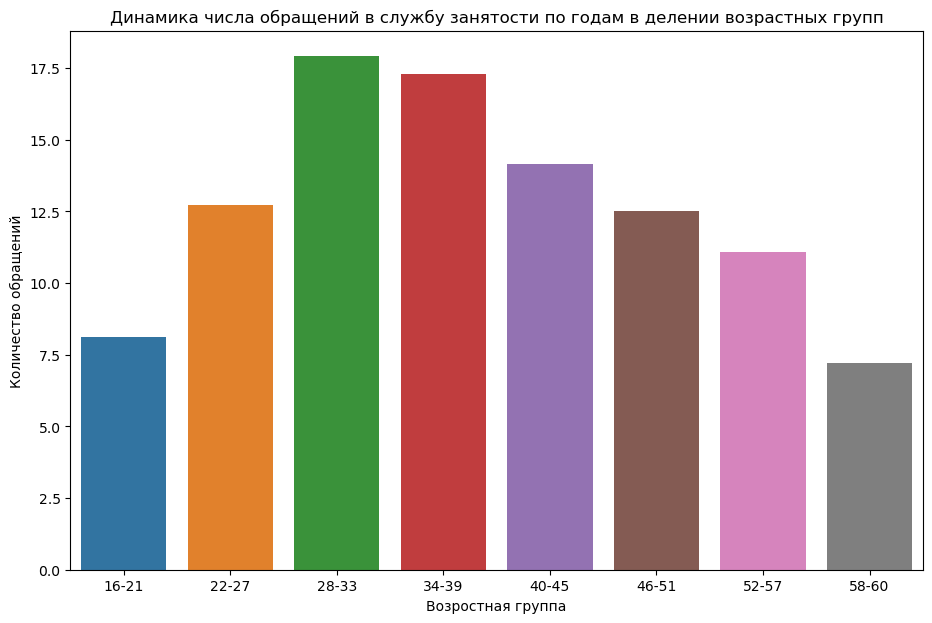

In [85]:
sns.barplot(data=data_req, y='count', x='age', ci=None).set(title='Динамика числа обращений в службу занятости по годам в делении возрастных групп',
                                                                               ylabel='Количество обращений',
                                                                               xlabel='Возростная группа')
plt.show()

Выводы:
Как мы видим, чаще всего в службу занятости обращаются граждане 28-33 и 34-39 лет

In [86]:
data_req['no_find/find_new_job_per'] = data_req['count'] / data_req['count'].sum() * 100
data_req[data_req['find_new_job']==True]

,region,district,year,month,hc_repeat,find_new_job,age,gender,education,count,no_find/find_new_job_per
64,Алтайский край,Сибирский федеральный округ,2017,1,False,True,16-21,0,2,2,0.000020
65,Алтайский край,Сибирский федеральный округ,2017,1,False,True,16-21,0,3,2,0.000020
66,Алтайский край,Сибирский федеральный округ,2017,1,False,True,16-21,0,4,8,0.000079
67,Алтайский край,Сибирский федеральный округ,2017,1,False,True,16-21,1,2,8,0.000079
68,Алтайский край,Сибирский федеральный округ,2017,1,False,True,16-21,1,3,7,0.000069
...,...,...,...,...,...,...,...,...,...,...,...
762886,г. Севастополь,Южный федеральный округ,2020,11,False,True,28-33,0,6,1,0.000010
762887,г. Севастополь,Южный федеральный округ,2020,11,False,True,40-45,0,4,1,0.000010
762888,г. Севастополь,Южный федеральный округ,2020,11,False,True,40-45,1,4,1,0.000010
762912,г. Севастополь,Южный федеральный округ,2020,11,True,True,40-45,0,6,1,0.000010


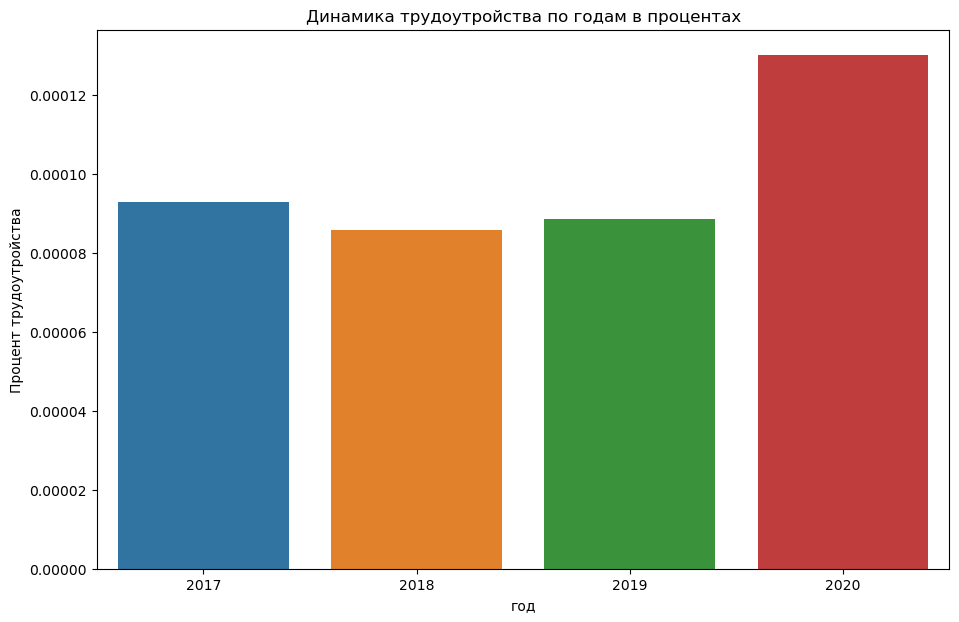

In [87]:
sns.barplot(data=data_req[data_req['find_new_job']==True], y='no_find/find_new_job_per', x='year', ci=None).set(title='Динамика трудоутройства по годам в процентах',
                                                                               ylabel='Процент трудоутройства',
                                                                               xlabel='год')
plt.show()

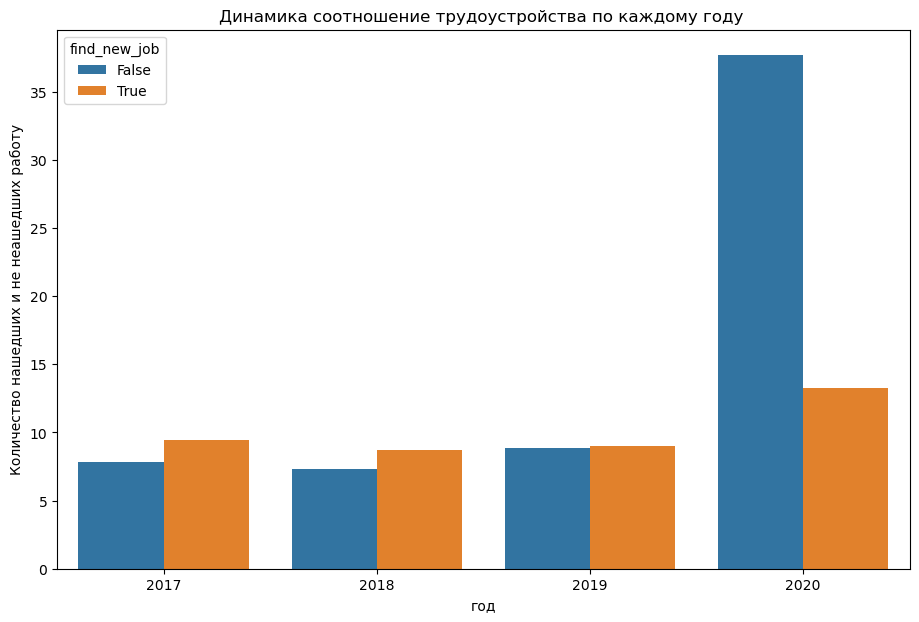

In [88]:
sns.barplot(data=data_req, y='count', x='year', hue='find_new_job', ci=None).set(title='Динамика соотношение трудоустройства по каждому году ',
                                                                               ylabel='Количество нашедших и не неашедших работу',
                                                                               xlabel='год')
plt.show()

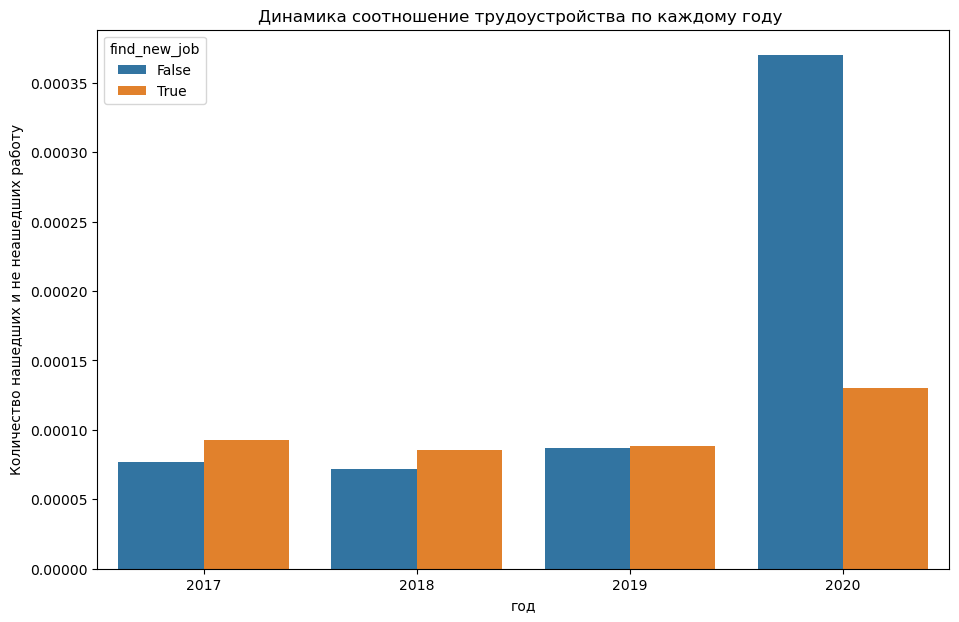

In [89]:
sns.barplot(data=data_req, y='no_find/find_new_job_per', x='year', hue='find_new_job', ci=None).set(title='Динамика соотношение трудоустройства по каждому году ',
                                                                               ylabel='Количество нашедших и не неашедших работу',
                                                                               xlabel='год')
plt.show()

Выводы: В 2020 году наблюдается резкий рост безработицы, при небольшом увеличении количества людей нашедших работу

In [90]:
education_dictionary = {
                            1:'Начальное общее образование',
                            2:'Основное общее образование',
                            3:'Среднее общее образование',
                            4:'Среднее профессиональное образование',
                            6:'Высшее образование',
                            9:'Другое',
                            0:'Нет данных'
                        }
gender_dictionary = {
                        1:'Мужчины',
                        0: 'Женщины',
                        'None': 'Не указан'}

In [91]:
data_req['education'] = data_req['education'].map(education_dictionary)
data_req['gender'] = data_req['gender'].map(gender_dictionary)

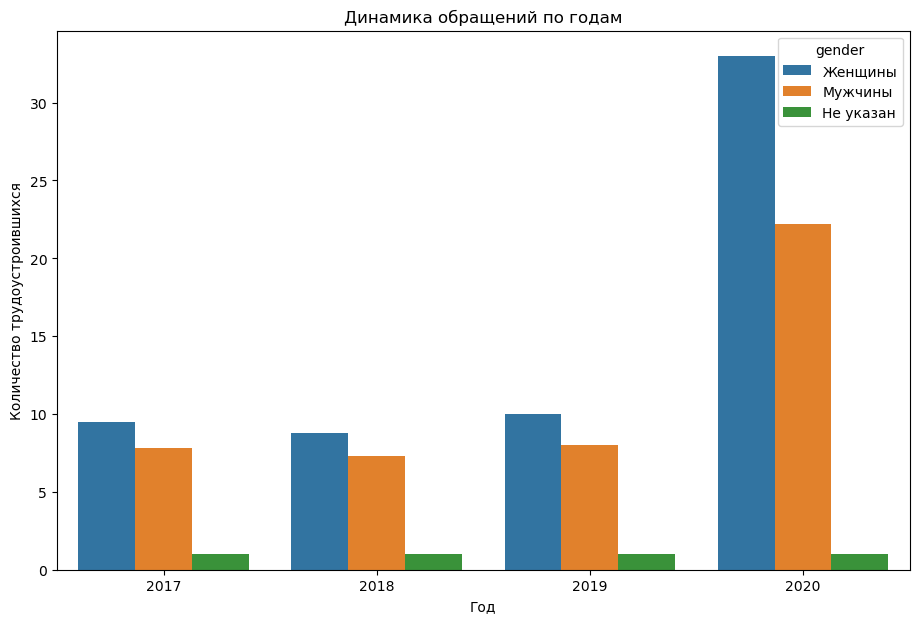

In [94]:
sns.barplot(data=data_req, y='count', x='year', hue='gender', ci=None).set(title='Динамика обращений по годам',
                                                                               ylabel='Количество трудоустроившихся',
                                                                               xlabel='Год')
plt.show()

Каждый год среди женщин больше обратившихся, в 2020 году разрыв еще увеличился, значит женщинам труднее найти работу


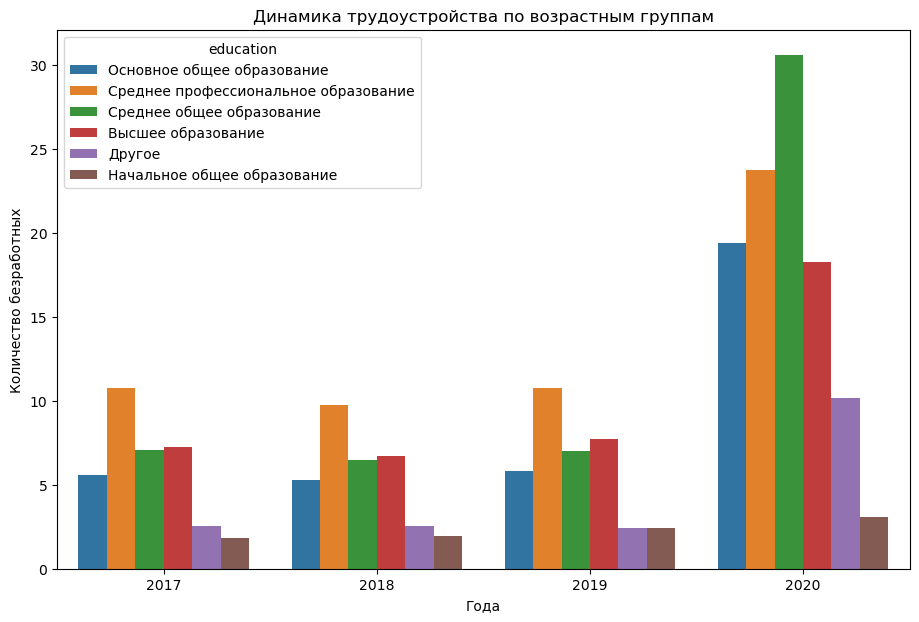

In [93]:
sns.barplot(data=data_req, y='count', x='year', hue='education', ci=None).set(title='Динамика трудоустройства по возрастным группам',
                                                                               ylabel='Количество безработных',
                                                                               xlabel='Года')
plt.show()

В 2017-2019 году больше всего обращались люди со средним профессиональном образованием, однако в 2020 году больше всго обращений был со стороны граждан со средним общим образванием.

In [103]:
data_req2020 = data_req[data_req['year']==2020]

In [104]:
month_list1 = {'Январь':1,
             "Февраль":2,
             "Март":3,
             "Апрель":4,
             "Май":5,
             "Июнь":6,
             "Июль":7,
             "Август":8,
            "Сентябрь":9,
             "Октябрь":10,
             "ноябрь":11, "Декабрь":12}

month_lis = {1:'Январь',
             2:"Февраль",
             3:"Март",
             4:"Апрель",
             5:"Май",
             6:"Июнь",
             7:"Июль",
             8:"Август",
             9:"Сентябрь",
             10:"Октябрь",
             11:"Ноябрь", 
             12:"Декабрь"}

In [107]:
data_req2020['month2020'] = data_req_2020['month'].map(month_lis)

C:\Users\Арсений\AppData\Local\Temp\ipykernel_24316\418052961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_req2020['month2020'] = data_req_2020['month'].map(month_lis)


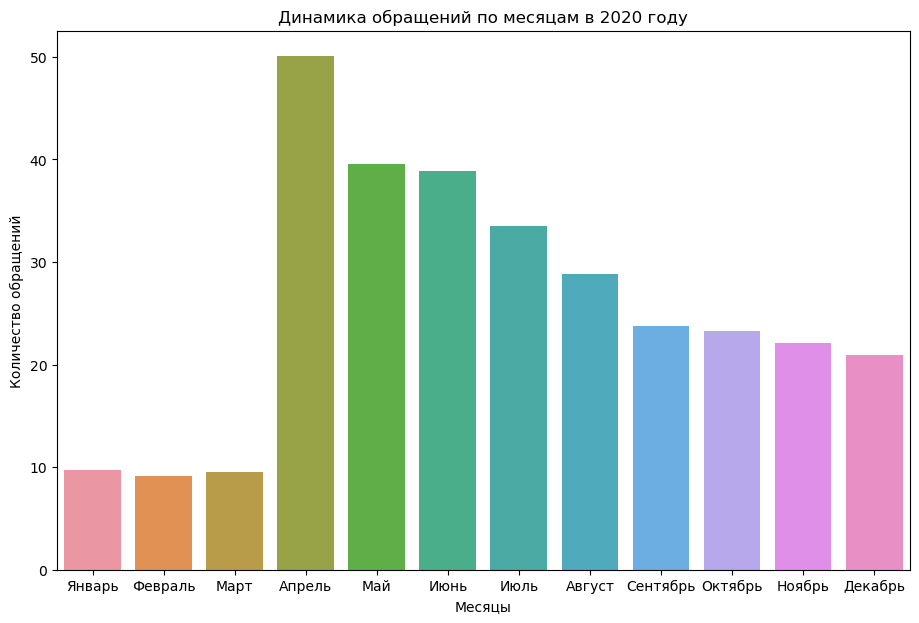

In [112]:
sns.barplot(data=data_req2020, y='count', x='month2020', ci=None).set(title='Динамика обращений по месяцам в 2020 году',
                                                                               ylabel='Количество обращений',
                                                                               xlabel='Месяцы')
plt.show()

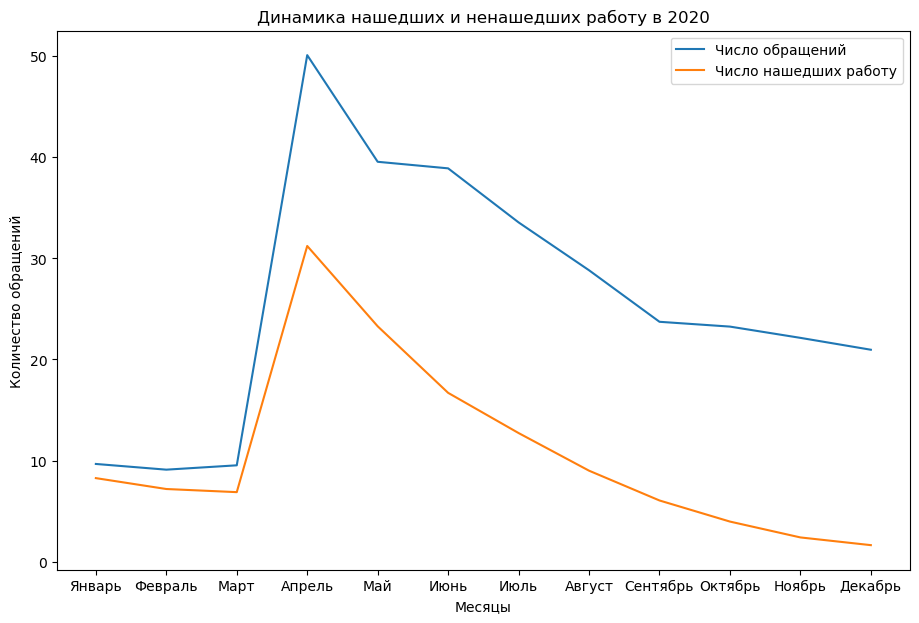

In [130]:
sns.lineplot(data=data_req2020, y='count', x='month2020', ci=None, label='Число обращений')
sns.lineplot(data=data_req2020[data_req2020['find_new_job']==True], y='count', x='month2020', ci=None, label = 'Число нашедших работу').set(title='Динамика нашедших и ненашедших работу в 2020',
ylabel='Количество обращений',
xlabel='Месяцы')
plt.show()

Как мы видим в марте- апреле 2020 года происходит резкий рост число обращений, больше половины из них даже смогли найти работу, однако количество людей обратившихся, но ненашедших работу резко возросло.

In [119]:
data_req2020['per'] = data_req2020['count'] / data_req2020['count'].sum() *100
data_req2020

C:\Users\Арсений\AppData\Local\Temp\ipykernel_24316\204310606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_req2020['per'] = data_req2020['count'] / data_req2020['count'].sum() *100


,region,district,year,month,hc_repeat,find_new_job,age,gender,education,count,no_find/find_new_job_per,month2020,gen_per,per
9277,Алтайский край,Сибирский федеральный округ,2020,1,False,False,16-21,Женщины,Основное общее образование,6,0.000059,Январь,0.000112,0.000112
9278,Алтайский край,Сибирский федеральный округ,2020,1,False,False,16-21,Женщины,Среднее общее образование,2,0.000020,Январь,0.000037,0.000037
9279,Алтайский край,Сибирский федеральный округ,2020,1,False,False,16-21,Женщины,Среднее профессиональное образование,2,0.000020,Январь,0.000037,0.000037
9280,Алтайский край,Сибирский федеральный округ,2020,1,False,False,16-21,Мужчины,Основное общее образование,6,0.000059,Январь,0.000112,0.000112
9281,Алтайский край,Сибирский федеральный округ,2020,1,False,False,16-21,Мужчины,Среднее общее образование,4,0.000039,Январь,0.000075,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762909,г. Севастополь,Южный федеральный округ,2020,11,True,False,52-57,Мужчины,Среднее профессиональное образование,1,0.000010,Ноябрь,0.000019,0.000019
762910,г. Севастополь,Южный федеральный округ,2020,11,True,False,58-60,Мужчины,Среднее общее образование,1,0.000010,Ноябрь,0.000019,0.000019
762911,г. Севастополь,Южный федеральный округ,2020,11,True,False,58-60,Мужчины,Высшее образование,1,0.000010,Ноябрь,0.000019,0.000019
762912,г. Севастополь,Южный федеральный округ,2020,11,True,True,40-45,Женщины,Высшее образование,1,0.000010,Ноябрь,0.000019,0.000019


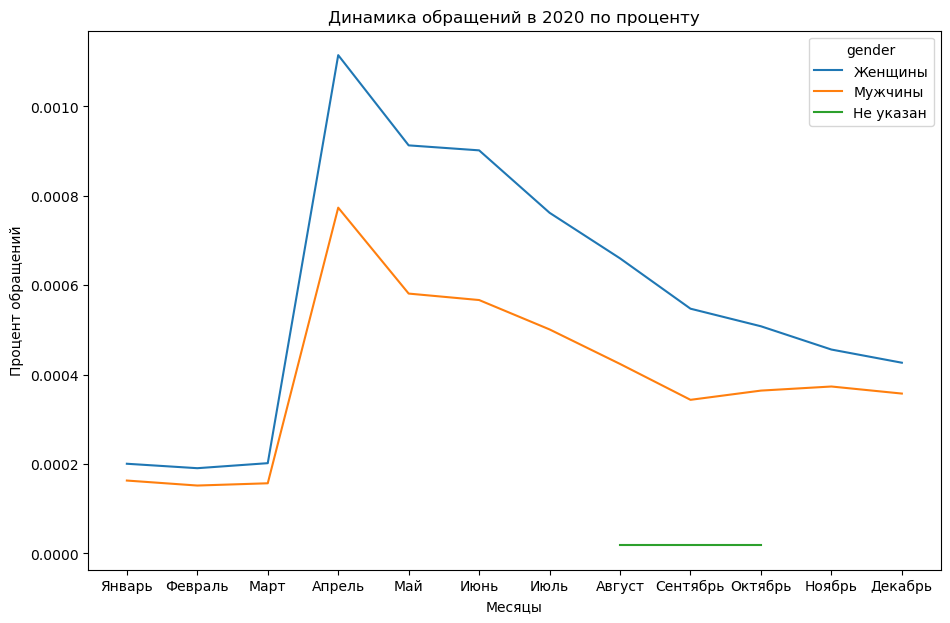

In [125]:
sns.lineplot(data=data_req2020, y='per', x='month2020',hue='gender' ,ci=None).set(title='Динамика обращений в 2020 по проценту',
ylabel='Процент обращений',
xlabel='Месяцы')
plt.show()

Пик обращений приходится на март-апрель 2020, именно тогда начали вводится ограничения, в связи с ковидом.

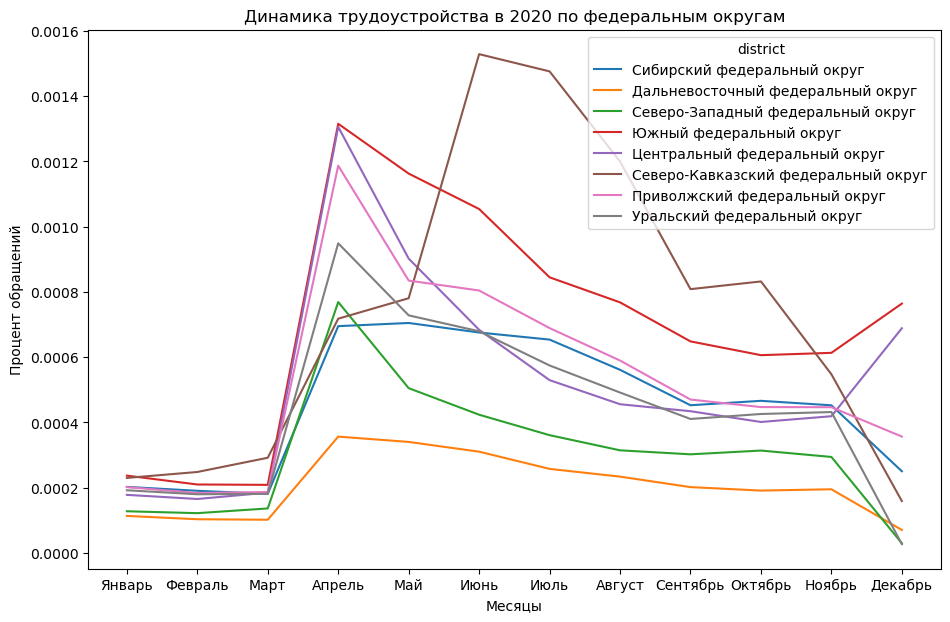

In [124]:
sns.lineplot(data=data_req2020, y='per', x='month2020',hue='district' ,ci=None).set(title='Динамика трудоустройства в 2020 по федеральным округам',
ylabel='Процент обращений',
xlabel='Месяцы')
plt.show()

Пик обращений в большинстве округов приходится на март 2020, однако в СК ФО он приходится на июнь.

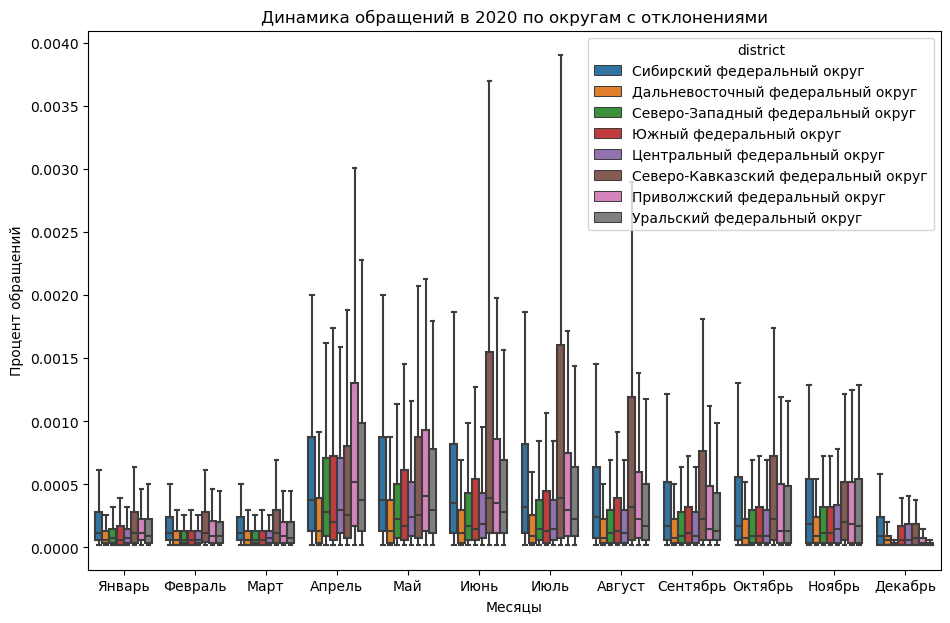

In [128]:
sns.boxplot(data=data_req2020, y='per', x='month2020',hue='district',showfliers=False).set(title='Динамика обращений в 2020 по округам с отклонениями',
ylabel='Процент обращений',
xlabel='Месяцы')
plt.show()

Самые большие отклонения наблюдаются у Северо-Кавказского федерального округа, больше всего отклонений приходится на лето

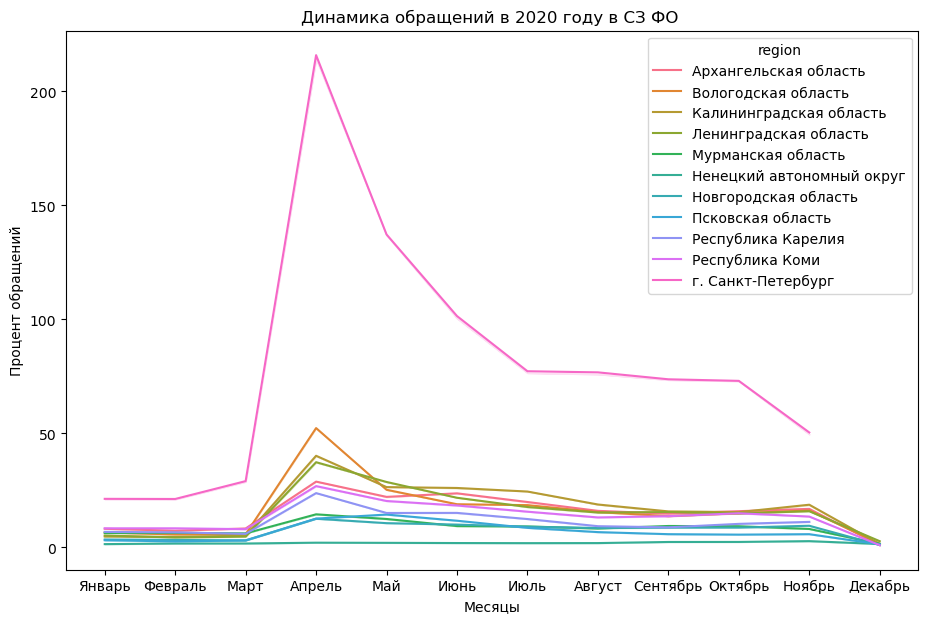

In [129]:
sns.lineplot(data=data_req2020[data_req2020['district']=='Северо-Западный федеральный округ'], y='count', x='month2020',hue='region',ci=False).set(title='Динамика обращений в 2020 году в СЗ ФО ',
ylabel='Процент обращений',
xlabel='Месяцы')
plt.show()

Больше всего обращений наблюдается в Санкт Петербурге и их резкий рост приходится на апрель 2020 года